<a href="https://colab.research.google.com/github/DionKimmm/2019SummerML/blob/master/Day17_mnist_using_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##신경망을 사용한 MNIST Classification

In [0]:
import numpy as np
import time

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [23]:
x_train = mnist.train.images
t_train = mnist.train.labels
x_test = mnist.test.images
t_test = mnist.test.labels

print(t_test.shape)


(10000, 10)


In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

In [0]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [0]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)/batch_size)

In [0]:
def numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
   
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val-h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [0]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f, x)
        
        return grad
        

In [0]:
def init_network(input_size, hidden_size, output_size, weight_init_std=0.01):
    network = {}
    network['W1'] = weight_init_std * np.random.randn(input_size, output_size)
    network['b1'] = np.zeros(output_size)
#     network['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
#     network['b2'] = np.zeros(output_size)
    return network
    

In [0]:
def predict(x):
    W1 = network['W1']
    b1 = network['b1']
    
    a1 = np.dot(x, W1) + b1
#     z1 = sigmoid(a1)
#     a2 = np.dot(z1, W2) + b2
    y = softmax(a1)
    
    return y

In [0]:
def loss(x, t):
    y = predict(x)
    return cross_entropy_error(y, t)

In [0]:
def accuracy(x, t):
    y = predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)
    
    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

In [0]:
def gradient(x, t):
    loss_W = lambda W: loss(x, t)
    
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, network['W1'])
    grads['b1'] = numerical_gradient(loss_W, network['b1'])
#     grads['W2'] = numerical_gradient(loss_W, network['W2'])
#     grads['b2'] = numerical_gradient(loss_W, network['b2'])
    
    return grads

In [34]:
network = init_network(input_size = 784, hidden_size=50, output_size= 10)
network['W1'].shape

(784, 10)

In [35]:
train_epochs = 50  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1
print(train_size)

55000


In [0]:
train_loss_list = []
train_acc_list = []
test_acc_list = []


In [37]:
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(train_epochs):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = gradient(x_batch, t_batch)
 
    for key in ('W1', 'b1'):
        network[key] -= learning_rate * grads[key]
        
    loss_val = loss(x_batch, t_batch)
    train_loss_list.append(loss_val)
    
#     if i % iter_per_epoch == 0:
    train_acc = accuracy(x_train, t_train)
    test_acc = accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.21525454545454545, 0.2124
train acc, test acc | 0.4127090909090909, 0.4109
train acc, test acc | 0.4941090909090909, 0.4987
train acc, test acc | 0.5165454545454545, 0.5264
train acc, test acc | 0.593690909090909, 0.6004
train acc, test acc | 0.6393636363636364, 0.6465
train acc, test acc | 0.6903090909090909, 0.6945
train acc, test acc | 0.7079454545454545, 0.7139
train acc, test acc | 0.6235636363636363, 0.6292
train acc, test acc | 0.7266727272727272, 0.7393
train acc, test acc | 0.7376363636363636, 0.7436
train acc, test acc | 0.7692363636363636, 0.7816
train acc, test acc | 0.7580727272727272, 0.7724
train acc, test acc | 0.7609272727272727, 0.7697
train acc, test acc | 0.7634909090909091, 0.7767
train acc, test acc | 0.7656, 0.7793
train acc, test acc | 0.7558727272727273, 0.7707
train acc, test acc | 0.7774, 0.7903
train acc, test acc | 0.7960363636363637, 0.8114
train acc, test acc | 0.7924909090909091, 0.8056
train acc, test acc | 0.7935090909090909, 0.

In [38]:
print(train_acc)

0.834690909090909


In [0]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show>

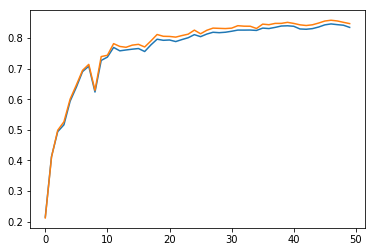

In [40]:
epochs = np.arange(train_epochs)
plt.plot(epochs, train_acc_list, test_acc_list)
plt.show